### Data visualization techniques to explore relationships between variables in a dataset ###
As part of the data exploration process, I imported the "Warehouse_and_Retail_Sales.csv" dataset from Data.gov and loaded it into a pandas data frame named df. To gain insights into the dataset, I performed several operations such as using the df.head() and df.info() functions. After a thorough analysis, I determined that the dataset did not contain any missing values.
In order to analyze the data and identify any underlying patterns or relationships, I utilized data visualization libraries including Matplotlib and Seaborn. These tools allowed me to efficiently and effectively present the data in a visually informative manner.





In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read data from CSV
df = pd.read_csv("Warehouse_and_Retail_Sales.csv")

# Data Exploration

# View the first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Summary statistics
print(df.describe())




   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL_SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL_TRANSFERS  WAREHOUSE_SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0          

Time Series Analysis: To perform time series analysis, I Plot the retail sales, retail transfers, and warehouse sales over time (year and month) to identify trends and seasonality. 

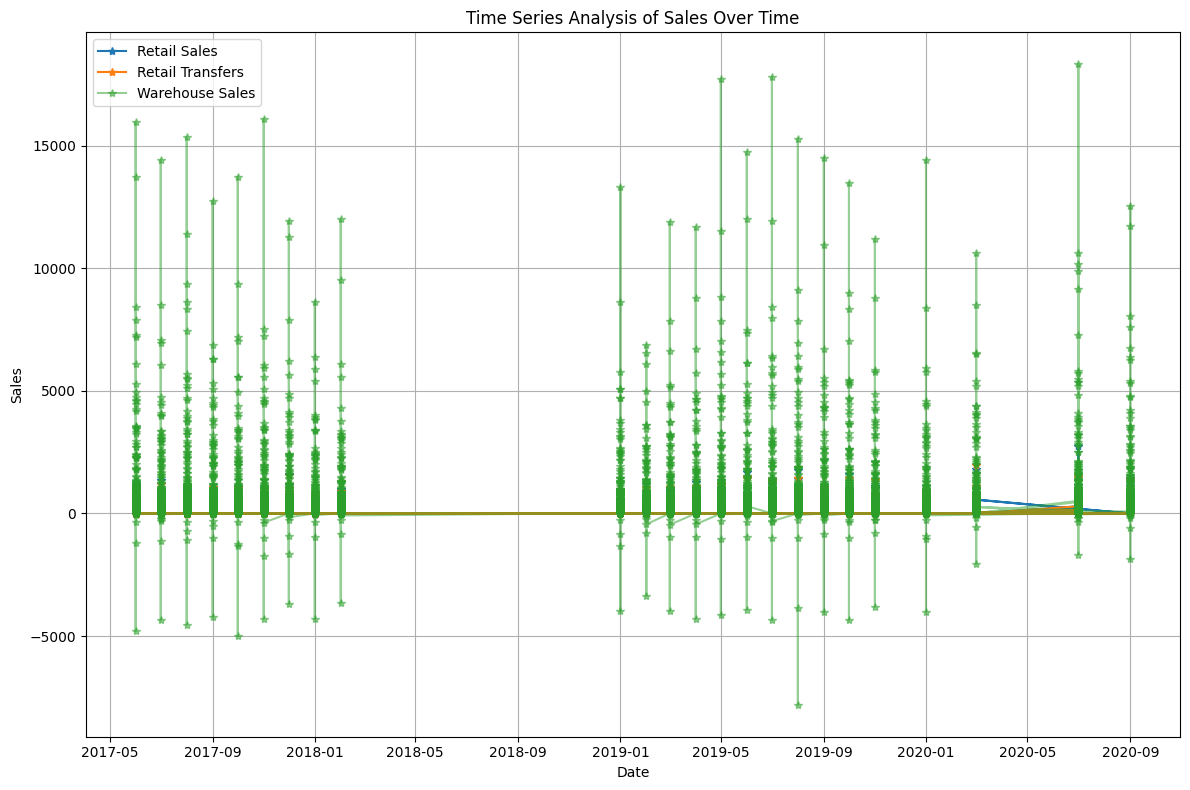

In [23]:
# Combine 'YEAR' and 'MONTH' columns into a single datetime column
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(day=1))

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Create a time series plot for retail sales, retail transfers, and warehouse sales
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['RETAIL_SALES'], label='Retail Sales', marker='*')
plt.plot(df.index, df['RETAIL_TRANSFERS'], label='Retail Transfers', marker='*')
plt.plot(df.index, df['WAREHOUSE_SALES'], label='Warehouse Sales', alpha = 0.5, marker='*')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Analysis of Sales Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Category-wise Analysis: I grouped data by item type and created bar plots or stacked bar plots to compare retail and warehouse sales across different item types.

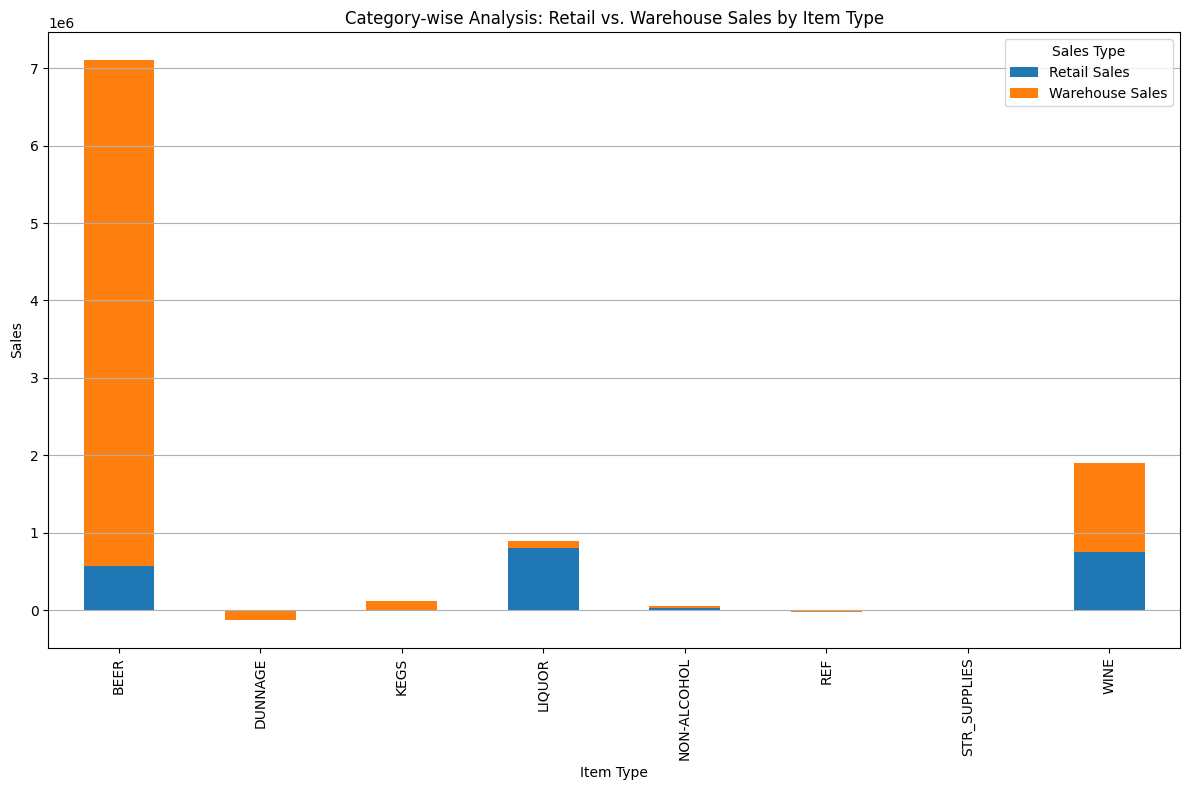

In [31]:
# Group the data by 'ITEM TYPE' and calculate the sum of 'RETAIL_SALES' and 'WAREHOUSE_SALES' for each item type
sales_by_item_type = df.groupby('ITEM TYPE')[['RETAIL_SALES', 'WAREHOUSE_SALES']].sum()

# Create a stacked bar plot
sales_by_item_type.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and a title
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.title('Category-wise Analysis: Retail vs. Warehouse Sales by Item Type')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Sales Type', labels=['Retail Sales', 'Warehouse Sales'])
plt.show()


Correlation Matrix: I Calculated and visualized the correlation between variables to identify relationships, especially between retail and warehouse sales.
The resulting heatmap will show the correlation between various variables in the dataset, including the correlation between retail sales and warehouse sales. Positive correlations will be indicated by warmer colors, negative correlations by cooler colors, and weaker correlations by values closer to zero.

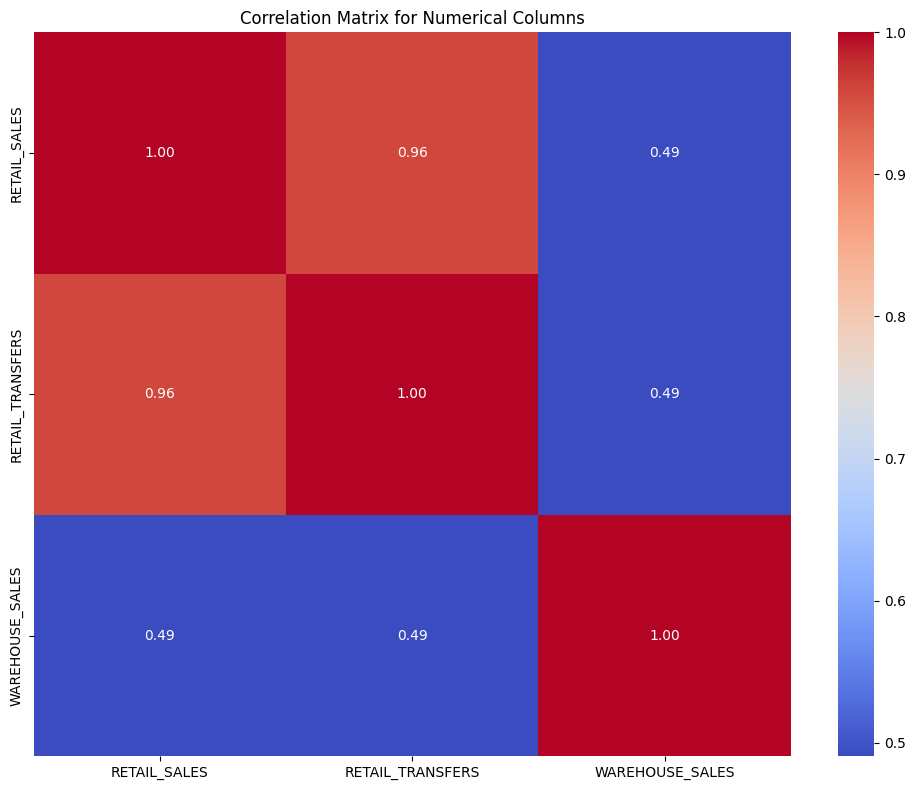

In [30]:
# Select only the numerical columns for correlation analysis
numerical_columns = ['RETAIL_SALES', 'RETAIL_TRANSFERS', 'WAREHOUSE_SALES']

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Matrix for Numerical Columns')

# Show the plot
plt.tight_layout()
plt.show()

